In [1]:
#Lightning Clustering over Ireland

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd


In [29]:
#read csv
data = pd.read_csv('Master_sferics_csv_dublin.csv')

C:\Users\brand\AppData\Local\Temp\ipykernel_20612\247861951.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Master_sferics_csv_dublin.csv')


In [30]:
data.head()

,dd/mm/yy hh:mm,latitude n,longitude w,Dublin
0,01/01/2005 10:15,53.3,-9.45,0
1,01/01/2005 10:15,53.275,-9.5,0
2,01/01/2005 10:50,54.4,-8.3,0
3,01/01/2005 10:50,53.825,-8.55,0
4,01/01/2005 10:50,54.375,-8.4,0


In [31]:
#Drop Dublin column
data = data.drop(['Dublin'], axis=1)
data.head()

,dd/mm/yy hh:mm,latitude n,longitude w
0,01/01/2005 10:15,53.3,-9.45
1,01/01/2005 10:15,53.275,-9.5
2,01/01/2005 10:50,54.4,-8.3
3,01/01/2005 10:50,53.825,-8.55
4,01/01/2005 10:50,54.375,-8.4


In [32]:
data.tail()

,dd/mm/yy hh:mm,latitude n,longitude w
244747,30/12/2023 17:38,53.986,-10.176
244748,30/12/2023 19:43,52.182,-5.266
244749,30/12/2023 21:36,52.992,-9.385
244750,messages,irish_sferics,total_sferics
244751,104611,158800,39677675


In [33]:
#delete the last two rows
data = data[:-2]

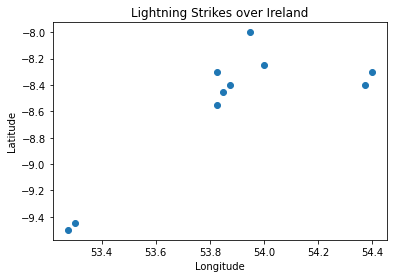

In [34]:
#plot the first 10 rows on a map of Ireland
#select the first 10 rows
data_10 = data[:10]
plt.scatter(data['latitude n'][:10], data['longitude w'][:10])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lightning Strikes over Ireland') 
plt.show()

c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Lightning Strikes over Ireland')

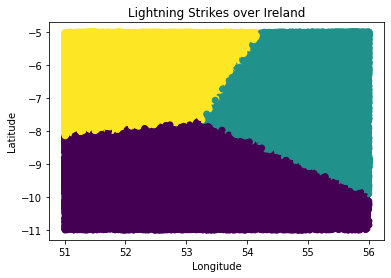

In [35]:
#run a clustering algorithm on the data
#standardize the data


#run PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['latitude n', 'longitude w']])

#run KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
data['cluster'] = kmeans.labels_

#plot the clusters
plt.scatter(data['latitude n'], data['longitude w'], c=data['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lightning Strikes over Ireland')

In [36]:
#pip install basemap

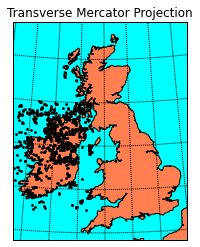

In [52]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'i' means use intermediate resolution coastlines.
# lon_0, lat_0 are the central longitude and latitude of the projection.
m = Basemap(llcrnrlon=-11.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
# can get the identical map this way (by specifying width and
# height instead of lat/lon corners)
m = Basemap(width=894887,height=1116766,\
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-40,61.,2.))
m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='aqua') 
#add the lightning data
x,y = m(data['longitude w'][:1000].values, data['latitude n'][:1000].values)
m.scatter(x,y,3,marker='o',color='k')
plt.title("Transverse Mercator Projection")
plt.show()

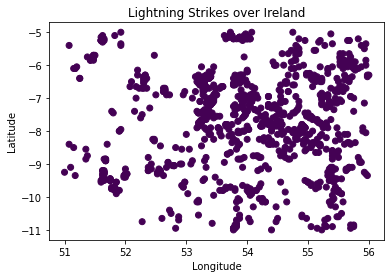

In [51]:
#DBSCAN clustering
#only use 1000 rows
data = data[:1000]
data_pca = pca.fit_transform(data[['latitude n', 'longitude w']])
dbscan = DBSCAN(eps=1, min_samples=5)
data['cluster'] = dbscan.fit_predict(data_pca)
plt.scatter(data['latitude n'], data['longitude w'], c=data['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lightning Strikes over Ireland') 
plt.show()

In [55]:
#seperate the data into seasons
data['dd/mm/yy hh:mm'] = pd.to_datetime(data['dd/mm/yy hh:mm'])
data['month'] = data['dd/mm/yy hh:mm'].dt.month
data['season'] = 'winter'
data.loc[data['month'].isin([3,4,5]), 'season'] = 'spring'
data.loc[data['month'].isin([6,7,8]), 'season'] = 'summer'
data.loc[data['month'].isin([9,10,11]), 'season'] = 'autumn'
data['season'].value_counts()

winter    560
spring    308
summer     89
autumn     43
Name: season, dtype: int64

In [57]:
data_winter = data[data['season'] == 'winter']
data_spring = data[data['season'] == 'spring']
data_summer = data[data['season'] == 'summer']
data_autumn = data[data['season'] == 'autumn']

In [58]:
data_winter.head()

,dd/mm/yy hh:mm,latitude n,longitude w,cluster,month,season
0,2005-01-01 10:15:00,53.3,-9.45,0,1,winter
1,2005-01-01 10:15:00,53.275,-9.5,0,1,winter
2,2005-01-01 10:50:00,54.4,-8.3,0,1,winter
3,2005-01-01 10:50:00,53.825,-8.55,0,1,winter
4,2005-01-01 10:50:00,54.375,-8.4,0,1,winter


c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brand\AppData\Local\Temp\ipykernel_20612\2244680503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_winter['cluster'] = kmeans.fit_predict(data_winter_pca)
c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brand\AppData\Local\Temp\ipykernel_20612\22

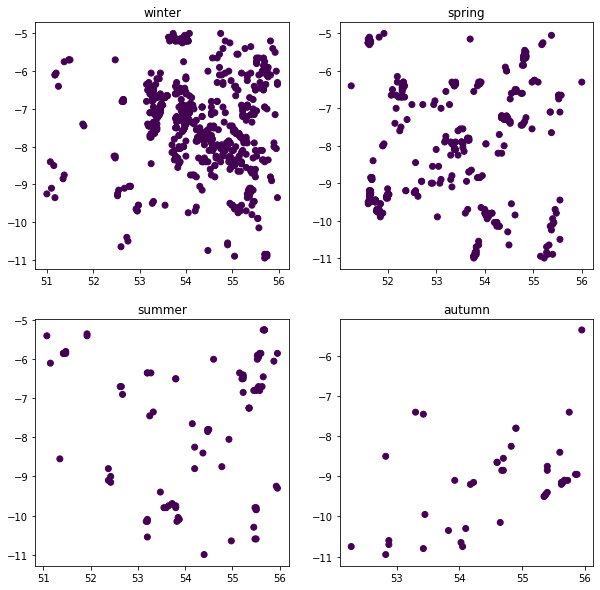

In [59]:
data_winter_pca = pca.fit_transform(data_winter[['latitude n', 'longitude w']])
data_spring_pca = pca.fit_transform(data_spring[['latitude n', 'longitude w']])
data_summer_pca = pca.fit_transform(data_summer[['latitude n', 'longitude w']])
data_autumn_pca = pca.fit_transform(data_autumn[['latitude n', 'longitude w']])

kmeans = KMeans(n_clusters=3)

data_winter['cluster'] = kmeans.fit_predict(data_winter_pca)
data_spring['cluster'] = kmeans.fit_predict(data_spring_pca)
data_summer['cluster'] = kmeans.fit_predict(data_summer_pca)
data_autumn['cluster'] = kmeans.fit_predict(data_autumn_pca)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, season in enumerate(['winter', 'spring', 'summer', 'autumn']):
    data_season = data[data['season'] == season]
    ax[i].scatter(data_season['latitude n'], data_season['longitude w'], c=data_season['cluster'])
    ax[i].set_title(season)

c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brand\AppData\Local\Temp\ipykernel_20612\856209500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_winter['cluster'] = kmeans.fit_predict(data_winter_pca)


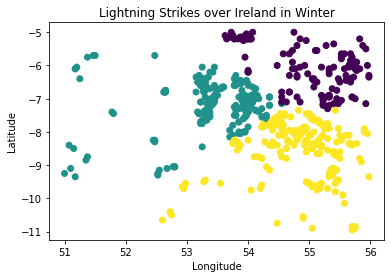

In [60]:
#plot the clusters for winter
data_winter = data[data['season'] == 'winter']
data_winter_pca = pca.fit_transform(data_winter[['latitude n', 'longitude w']])
kmeans = KMeans(n_clusters=3)
data_winter['cluster'] = kmeans.fit_predict(data_winter_pca)
plt.scatter(data_winter['latitude n'], data_winter['longitude w'], c=data_winter['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lightning Strikes over Ireland in Winter')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_20612\2246205338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_winter['cluster'] = dbscan.fit_predict(data_winter_pca)


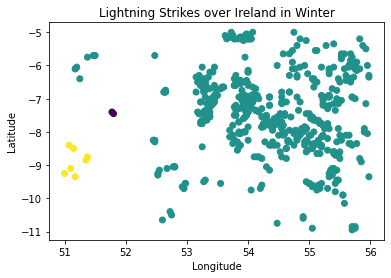

In [66]:
#plot the clusters for winter, db scan
data_winter = data[data['season'] == 'winter']
data_winter_pca = pca.fit_transform(data_winter[['latitude n', 'longitude w']])
dbscan = DBSCAN(eps=1, min_samples=5)
data_winter['cluster'] = dbscan.fit_predict(data_winter_pca)
plt.scatter(data_winter['latitude n'], data_winter['longitude w'], c=data_winter['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lightning Strikes over Ireland in Winter')
plt.show()